# <font color = 'orange'>타이타닉 생존자 예측하기

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## 타이타닉 탑승자 데이터 소개

- ***Passengerid*** : 탐승자 데이터 일련번호
- ***survived*** : 생존여부
    - 0 = 사망
    - 1 = 생존
- ***pclass*** : 티켓의 선실 등급
    - 1 = 일등석
    - 2 = 이등석
    - 3 = 삼등석
- ***sex*** : 탑승자 성별
- ***name*** : 탑승자 이름
- ***Age*** : 탑승자 나이
- ***sibsp*** : 같이 탑승한 형제자매 또는 배우자 인원수
- ***parch*** : 같이 탑승한 부모님 또는 어린이 인원수
- ***ticket*** : 티켓 번호
- ***fare*** : 요금
- ***cabin*** : 선실 번호
- ***embarked*** : 중간 정착 항구
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton

In [40]:
# 로딩된 데이터의 칼럼 타입 확인하기
## RangeIndex : DataFrame 인덱스의 범위, 전체 로우 수를 알 수 있음
print('\n ### 학습 데이터 정보 ###')
print(titanic_df.info())


 ### 학습 데이터 정보 ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## 데이터 처리

### Null 데이터 처리

- **Age** : 평균나이
- **Cabin, Embarked** : 'N'

In [42]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 개수',titanic_df.isnull().sum())

데이터 세트 Null 값 개수 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### 문자열 피처 (Sex, Cabin, Embarked) 분포 확인하기

In [44]:
print('\n Sex 값 분포 : \n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 : \n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 : \n',titanic_df['Embarked'].value_counts())


 Sex 값 분포 : 
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 : 
 N              687
B96 B98          4
G6               4
C23 C25 C27      4
E101             3
              ... 
E63              1
A24              1
C32              1
E34              1
D28              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


### Cabin 칼럼 데이터 처리

In [45]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1] # 앞 문자만 추출
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


## 데이터 탐색

In [46]:
# 성별에 따른 생존자 수 비교 및 시각화
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

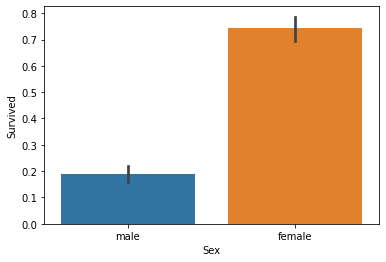

In [47]:
sns.barplot(x='Sex',y='Survived', data = titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

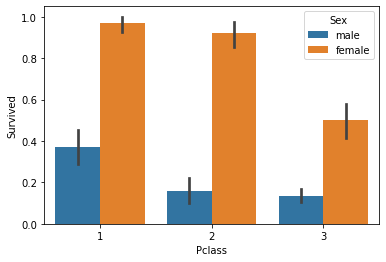

In [48]:
# 객실 등급에 따른 생존자 수 비교 및 시각화
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df) # 객실 등급별 성별에 따른 생존 확률

In [49]:
# Age에 따른 생존 확률
# 범위별로 분류해 카테고리 할당
def get_category(age):
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
        
    return cat

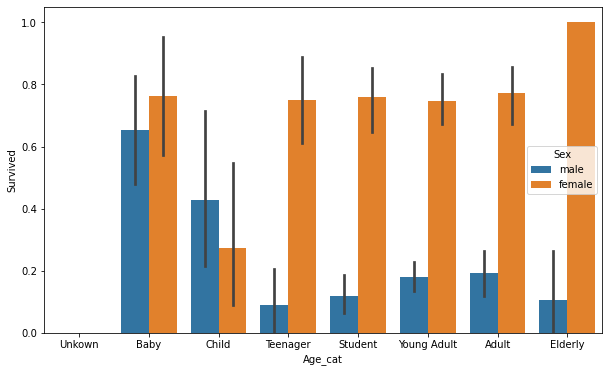

In [50]:
plt.figure(figsize = (10,6)) # figure 설정
group_names = ['Unkown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly'] # x축 값 순서

# get_category(x)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df, order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

## 문자열 카테고리 피처 변환

In [51]:
from sklearn import preprocessing


def encode_features(dataDF):
    features = ['Cabin','Sex','Embarked'] # 문자열 카테고리
    for feature in features:
        le = preprocessing.LabelEncoder() # 레이블 인코딩 객체
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


## 데이터 전처리 정리

In [52]:
# Null 처리 
def filna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    
    return df

    
# 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis = 1, inplace = True)
    return df

# 레이블 인코딩
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1] # 앞 문자만 추출
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

# 위의 전처리 함수 호출
def transform_features(df):
    df = filna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

## 타이타닉 생존자 예측하기

In [53]:
# 원본 데이터 재로딩
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived'] # 레이블 데이터 세트 추출
x_titanic_df = titanic_df.drop('Survived',axis=1) # 피처 데이터 세트 추출

x_titanic_df = transform_features(x_titanic_df)

In [54]:
from sklearn.model_selection import train_test_split

# 테스트 데이터 세트 추출 (전체의 20%)
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size = 0.2, random_state=11)

In [57]:
# ML 알고리즘 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # 예측 성능 평가 API

In [64]:
# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression()

In [66]:
# DecisionTreeClassifier 
dt_clf.fit(x_train,y_train) # 학습
dt_pred = dt_clf.predict(x_test) # 예측
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test,dt_pred))) # 평가

# RandomForestClassifier 
rf_clf.fit(x_train,y_train) # 학습
rf_pred = rf_clf.predict(x_test) # 예측
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test,rf_pred))) # 평가

# LogisticRegression
lr_clf.fit(x_train,y_train) # 학습
lr_pred = lr_clf.predict(x_test) # 예측
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test,lr_pred))) # 평가

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8492


In [68]:
# KFold 교차 검증
from sklearn.model_selection  import KFold

def exec_kfold(clf, folds = 5):
    # 폴드 세트를 5개인 KFold 생성
    kfold = KFold(n_splits=folds)
    # 폴드 수만큼 예측 결과 저장을 위한 리스트 생성
    scores = []
    
    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(x_titanic_df)):
        # x_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        x_train, x_test = x_titanic_df.values[train_index], x_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index] # 레이블
        
        # Classifier
        clf.fit(x_train, y_train) # 학습
        predictions = clf.predict(x_test) # 예측
        accuracy = accuracy_score(y_test,predictions) # 정확도
        scores.append(accuracy)
        print("교차 검증 {0} wjdghkreh : {1:.4f}".format(iter_count,accuracy))
    
    # 5개 fold에서 평균 정확도 계산
    mean_score = np.mean(scores)
    print("평균 정확도 : {0:.4f}".format(mean_score))
    
# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 wjdghkreh : 0.7542
교차 검증 1 wjdghkreh : 0.7809
교차 검증 2 wjdghkreh : 0.7865
교차 검증 3 wjdghkreh : 0.7697
교차 검증 4 wjdghkreh : 0.8202
평균 정확도 : 0.7823


In [71]:
# cross_val_score() API를 이용한 교차 검증
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, x_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))

print("평균 정확도 : {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427
평균 정확도 : 0.7879


In [74]:
# GridSearchCV를 이용하여 최적의 하이퍼 파라미터 찾기
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring='accuracy',cv = 5)
grid_dclf.fit(x_train,y_train)

print('GridSearchCV 최적 하이퍼 파라미터:',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# 최적의 하이퍼파라미터로 학습된 estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(x_test)
accuracy = accuracy_score(y_test,dpredictions)
print('데이터 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
데이터 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
